# US Raspberry market analysis

TERMINAL MARKET

    Retail price
  

## Import and cleaning data

### Import data

In [1]:
# Importing libraries 
import pandas as pd 
from datetime import date

# Getting current date data to collect updated information
fday = date.today().strftime('%d')
fmonth = date.today().strftime('%m')
fyear = date.today().strftime('%Y')

# URL for accessing raspberry prices in the city of San Francisco
USprices = f"https://www.marketnews.usda.gov/mnp/fv-report-top-filters\
?&commAbr=RASP&varName=&locAbr=SX&repType=termPriceDaily\
&termNavClass=&stateID=&navType=byComm&Go=Go\
&locName=SAN+FRANCISCO&navClass=&hidecolumn=on&type=termPrice&shipNavClass=&volume=&environment=&movNavClass=\
&commName=RASPBERRIES&portal=fv&organic=N&repDate=03%2F20%2F1990&endDate={fmonth}%2F{fday}%2F{fyear}&format=excel&rebuild=false"
  
# Assign the table data in html format to a Pandas dataframe
table =  pd.read_html(USprices,header=0,parse_dates=['Date'])[0]
  
# Store the dataframe in Excel file to avoid html tags and save data source file
file_path = './Data/USprices.xls'
table.to_excel(file_path) 

# Read the Excel in a Pandas dataframe
prices = pd.DataFrame()
prices = pd.read_excel(file_path\
                    ,header=0
                    ,usecols= ['City Name',\
                                'Package',\
                                'Variety',\
                                'Origin',\
                                'Item Size',\
                                'Quality',\
                                'Condition',\
                                'Type',\
                                'Appearance',\
                                'Date',\
                                'Low Price',\
                                'High Price'])

### Validations

In [2]:
allDays = False

while not allDays:
    if len(prices['Date'].dt.day.unique()) == 31:
        allDays = True
    else:
        print('Month days missing')

#Reference: http://easypythondocs.com/validation.html

### Dimension reduction

 
    FIELD	    FILTER
    City Name	All
    Package	    flats 12 6-oz cups with lids
    Variety	    RED
    Origin	    MEXICO
    Quality	    Blank
    Condition	Blank
    Appearance	Blank
    Type        Blank
    Item Size   Lge
    Date
    Low Price	
    High Price	

In [3]:
# Dimension reduction
prices_clean = prices [(prices['Origin']=='MEXICO')\
         & (prices['Package']=='flats 12 6-oz cups with lids')\
         & (prices['Variety']=='RED')\
         & ((pd.isna(prices['Quality']))) 
         & (pd.isna(prices['Condition']))\
         #& (prices['Item Size']=='lge')\
         & ((pd.isna(prices['Item Size'])))\
         & (pd.isna(prices['Type']))\
         & ((pd.isna(prices['Appearance']))) ]
# Drop duplicates
prices_clean.dropna(axis=1,thresh=500,inplace=True)
prices_clean.dropna(axis=0,inplace=True)
prices_clean.drop_duplicates(subset=['City Name','Date'], inplace=True)
prices_clean['Avg Price']=(prices_clean['Low Price']+prices_clean['High Price'])/2
prices_clean.drop(['City Name','Package','Variety','Low Price','High Price','Origin'], axis=1, inplace=True)
prices_clean.set_index('Date',inplace=True)

/home/matozqui/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/home/matozqui/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/home/matozqui/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/matozqui/anaconda3/lib

### Plotting

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date

In [5]:
prices_clean.resample('W').mean().truncate(after='2011',before='2010').\
                                reset_index()['Date'].apply\
                                (lambda x: x.weekofyear)

0     53
1      1
2      2
3      3
4      4
5      5
6      6
7      7
8      8
9      9
10    10
11    11
12    12
13    13
14    14
15    15
16    16
17    17
18    18
19    19
20    20
21    21
22    22
23    23
24    24
25    25
26    26
27    27
28    28
29    29
30    30
31    31
32    32
33    33
34    34
35    35
36    36
37    37
38    38
39    39
40    40
41    41
42    42
43    43
44    44
45    45
46    46
47    47
48    48
49    49
50    50
51    51
Name: Date, dtype: int64

/home/matozqui/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


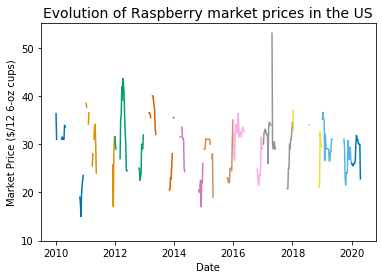

In [6]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib.pyplot import figure

with sns.color_palette("colorblind",11): # color RdBu_r
    ax = plt.plot(prices_clean.resample('W').mean().truncate(after='2011',before='2010'),label='2010')
    ax = plt.plot(prices_clean.resample('W').mean().truncate(after='2012',before='2011'),label='2011')
    ax = plt.plot(prices_clean.resample('W').mean().truncate(after='2013',before='2012'),label='2012')
    ax = plt.plot(prices_clean.resample('W').mean().truncate(after='2014',before='2013'),label='2013')
    ax = plt.plot(prices_clean.resample('W').mean().truncate(after='2015',before='2014'),label='2014')
    ax = plt.plot(prices_clean.resample('W').mean().truncate(after='2016',before='2015'),label='2015')
    ax = plt.plot(prices_clean.resample('W').mean().truncate(after='2017',before='2016'),label='2016')
    ax = plt.plot(prices_clean.resample('W').mean().truncate(after='2018',before='2017'),label='2017')
    ax = plt.plot(prices_clean.resample('W').mean().truncate(after='2019',before='2018'),label='2018')
    ax = plt.plot(prices_clean.resample('W').mean().truncate(after='2020',before='2019'),label='2019')
    ax = plt.plot(prices_clean.resample('W').mean().truncate(after='2021',before='2020'),label='2020')
    plt.title('Evolution of Raspberry market prices in the US', fontsize=14)
    plt.xlabel('Date', fontsize=10)
    plt.ylabel('Market Price ($/12 6-oz cups)', fontsize=10)
    plt.savefig('./Evolution_Raspberry_US.png')
    plt.show()

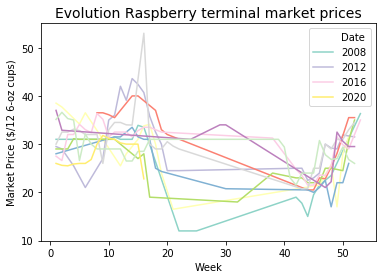

In [7]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib.pyplot import figure
import datetime

plot_prices = prices_clean.resample('W').mean().truncate(after = '2021',before = '2010')
ax = sns.lineplot(x = plot_prices.index.week,
                  y = plot_prices['Avg Price'],
                  hue = plot_prices.index.year,
                  data = plot_prices, palette = "Set3")
plt.title('Evolution Raspberry terminal market prices', fontsize=14)
plt.xlabel('Week', fontsize=10)
plt.ylabel('Market Price ($/12 6-oz cups)', fontsize=10)
plt.savefig('./Evolution_Raspberry_US.png')
plot_prices['Week_Num']=plot_prices.index.week
plot_prices.groupby('Week_Num').agg('count')
plt.show()

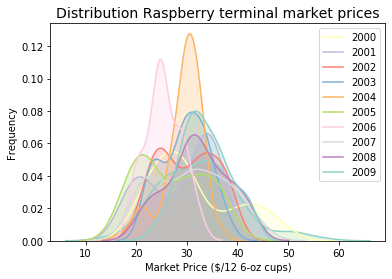

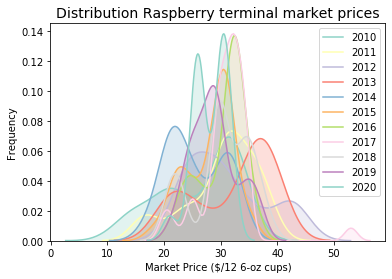

In [8]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

plot_prices_na = plot_prices.fillna(-1)
with sns.color_palette("Set3",10):
    ax = sns.kdeplot(prices_clean['Avg Price'].truncate(after='2000',before='1999'),label='', shade=True)
    ax = sns.kdeplot(prices_clean['Avg Price'].truncate(after='2001',before='2000'),label='2000', shade=True)
    ax = sns.kdeplot(prices_clean['Avg Price'].truncate(after='2002',before='2001'),label='2001', shade=True)
    ax = sns.kdeplot(prices_clean['Avg Price'].truncate(after='2003',before='2002'),label='2002', shade=True)
    ax = sns.kdeplot(prices_clean['Avg Price'].truncate(after='2004',before='2003'),label='2003', shade=True)
    ax = sns.kdeplot(prices_clean['Avg Price'].truncate(after='2005',before='2004'),label='2004', shade=True)
    ax = sns.kdeplot(prices_clean['Avg Price'].truncate(after='2006',before='2005'),label='2005', shade=True)
    ax = sns.kdeplot(prices_clean['Avg Price'].truncate(after='2007',before='2006'),label='2006', shade=True)
    ax = sns.kdeplot(prices_clean['Avg Price'].truncate(after='2008',before='2007'),label='2007', shade=True)
    ax = sns.kdeplot(prices_clean['Avg Price'].truncate(after='2009',before='2008'),label='2008', shade=True)
    ax = sns.kdeplot(prices_clean['Avg Price'].truncate(after='2010',before='2009'),label='2009', shade=True)
    plt.title('Distribution Raspberry terminal market prices', fontsize=14)
    plt.xlabel('Market Price ($/12 6-oz cups)', fontsize=10)
    plt.ylabel('Frequency', fontsize=10)
    plt.savefig('./Distribution_Raspberry_US.png')
    plt.show()

with sns.color_palette("Set3",10):
    ax = sns.kdeplot(prices_clean['Avg Price'].truncate(after='2011',before='2010'),label='2010', shade=True)
    ax = sns.kdeplot(prices_clean['Avg Price'].truncate(after='2012',before='2011'),label='2011', shade=True)
    ax = sns.kdeplot(prices_clean['Avg Price'].truncate(after='2013',before='2012'),label='2012', shade=True)
    ax = sns.kdeplot(prices_clean['Avg Price'].truncate(after='2014',before='2013'),label='2013', shade=True)
    ax = sns.kdeplot(prices_clean['Avg Price'].truncate(after='2015',before='2014'),label='2014', shade=True)
    ax = sns.kdeplot(prices_clean['Avg Price'].truncate(after='2016',before='2015'),label='2015', shade=True)
    ax = sns.kdeplot(prices_clean['Avg Price'].truncate(after='2017',before='2016'),label='2016', shade=True)
    ax = sns.kdeplot(prices_clean['Avg Price'].truncate(after='2018',before='2017'),label='2017', shade=True)
    ax = sns.kdeplot(prices_clean['Avg Price'].truncate(after='2019',before='2018'),label='2018', shade=True)
    ax = sns.kdeplot(prices_clean['Avg Price'].truncate(after='2020',before='2019'),label='2019', shade=True)
    ax = sns.kdeplot(prices_clean['Avg Price'].truncate(after='2021',before='2020'),label='2020', shade=True)
    plt.title('Distribution Raspberry terminal market prices', fontsize=14)
    plt.xlabel('Market Price ($/12 6-oz cups)', fontsize=10)
    plt.ylabel('Frequency', fontsize=10)
    plt.savefig('./Distribution_Raspberry_US.png')
    plt.show()

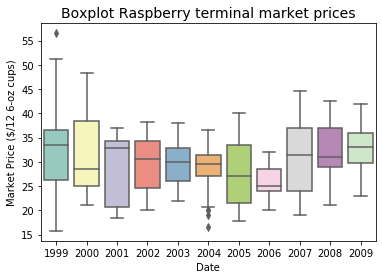

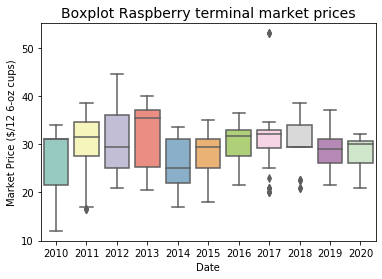

In [27]:
ax = sns.boxplot(x=prices_clean.truncate(before='1999',after='2010').index.year,
                 y=prices_clean.truncate(before='1999',after='2010')['Avg Price'],
                 data=prices_clean.truncate(before='1999',after='2010'), palette="Set3")
plt.title('Boxplot Raspberry terminal market prices', fontsize=14)
plt.xlabel('Date', fontsize=10)
plt.ylabel('Market Price ($/12 6-oz cups)', fontsize=10)
plt.savefig('./Boxplot_Raspberry_US.png')
plt.show()

ax = sns.boxplot(x=prices_clean.truncate(before='2010').index.year,
                 y=prices_clean.truncate(before='2010')['Avg Price'],
                 data=prices_clean.truncate(before='2010'), palette="Set3")
plt.title('Boxplot Raspberry terminal market prices', fontsize=14)
plt.xlabel('Date', fontsize=10)
plt.ylabel('Market Price ($/12 6-oz cups)', fontsize=10)
plt.savefig('./Boxplot_Raspberry_US.png')
plt.show()

### Modeling

#### Prepare data

In [10]:
import datetime
df_prices = prices_clean.resample('W').mean().reset_index()
df_prices['Year']=df_prices['Date'].dt.year
df_prices['Week']=df_prices['Date'].dt.week
df_prices.drop(df_prices[df_prices['Week']==53].index,axis=0, inplace=True)
import pandasql as ps
for y in range(1,11):
    q1 = """SELECT dfprev.[Avg Price] FROM df_prices dfcur
        LEFT JOIN df_prices dfprev 
        ON dfcur.Week = dfprev.Week AND dfprev.Year = (dfcur.Year - """+ str(y) +")"
    vname = 'Price-' + str(y)
    df_prices[vname] = ps.sqldf(q1, locals())


data = df_prices[['Avg Price','Price-1','Price-2','Price-3','Price-4',\
                  'Price-5','Price-6','Price-7','Price-8','Price-9','Price-10']]
data['Avg Price-mean'] = data[['Price-1','Price-2','Price-3','Price-4',\
                  'Price-5','Price-6','Price-7','Price-8','Price-9','Price-10']].mean(axis = 1) 
data.dropna(axis=0,how='all',inplace = True)
data.dropna(axis=1,how='all',inplace = True)
data.dropna(subset=['Avg Price'],inplace=True)
data.dropna(subset=['Avg Price-mean'],inplace=True)

/home/matozqui/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/matozqui/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/matozqui/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/matozqui/a

#### Create model

#### Linear Regression

In [11]:
from sklearn.model_selection import train_test_split
# Data Preparation
X = data[['Avg Price']] # pandas DataFrame
y = data['Avg Price-mean'] # pandas Series
# Split data set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.10)
# Load the library
from sklearn.linear_model import LinearRegression
# Create an instance of the model
reg = LinearRegression()
# Fit the regressor
reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

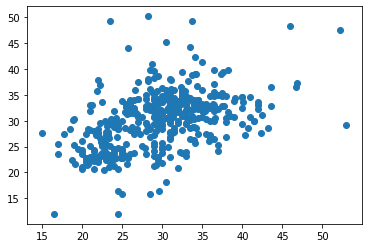

In [12]:
plt.scatter(X,y)

In [13]:
# Load the library
from sklearn.model_selection import train_test_split
# Create 2 groups each with input and labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10)
# Fit only with training data
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Metrics model

In [14]:
import numpy as np

myMAPE = np.mean(np.abs(reg.predict(X_test) - y_test)/y_test)
myMAPE

0.13229468370359476

In [15]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(reg.predict(X_test), y_test)

3.790922887882674

In [16]:
from sklearn.metrics import mean_squared_error

# Use against predictions (we have to calculate the squared root of MSE)
np.sqrt(mean_absolute_error(reg.predict(X_test), y_test))

1.9470292467969437

In [17]:
np.corrcoef(reg.predict(X_test), y_test)[0][1]

0.4583951180043535

In [18]:
data.describe()

,Avg Price,Price-1,Price-2,Price-3,Price-4,Price-5,Price-6,Price-7,Price-8,Price-9,Price-10,Avg Price-mean
count,443.000000,308.000000,285.000000,282.000000,258.000000,250.000000,220.000000,222.000000,200.000000,191.000000,168.000000,443.000000
mean,29.623664,30.458834,29.866316,30.378147,30.579506,29.492550,30.006080,30.305236,30.849333,30.127705,31.120015,30.215458
std,5.921343,6.350200,6.801699,6.299766,6.458744,6.490766,6.748188,6.893841,6.862457,7.272080,7.036256,5.476942
min,15.000000,12.000000,12.000000,17.000000,17.000000,15.000000,15.000000,12.000000,15.750000,15.000000,15.750000,12.000000
25%,25.000000,25.537500,24.500000,25.375000,25.500000,24.500000,24.462500,25.000000,25.500000,24.300000,25.900000,26.546250
50%,30.000000,31.000000,30.000000,31.000000,31.000000,29.400000,30.000000,30.225000,30.950000,30.000000,31.025000,30.791667
75%,33.000000,34.062500,33.950000,33.928125,34.150000,33.000000,34.212500,34.500000,35.000000,34.250000,35.625000,33.560714
max,53.000000,52.166667,53.000000,53.000000,52.166667,52.166667,52.166667,51.250000,52.166667,52.166667,52.166667,50.208333


#### K neighbours

In [19]:
from sklearn.neighbors import KNeighborsRegressor

# Create an instance.
# Define number of neighbors.
# weights possible values: 'uniform', 'distance', [callable] user defined function
regk = KNeighborsRegressor(n_neighbors=2, weights = 'uniform')

# Train the data
regk.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                    weights='uniform')

In [20]:
import numpy as np

myMAPE = np.mean(np.abs(regk.predict(X_test) - y_test)/y_test)
myMAPE

0.14199982100306768

In [21]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(regk.predict(X_test), y_test)

4.179511114785418

In [22]:
from sklearn.metrics import mean_squared_error

# Use against predictions (we have to calculate the squared root of MSE)
np.sqrt(mean_absolute_error(reg.predict(X_test), y_test))

1.9470292467969437

#### Decision Tree Regressor

In [23]:
from sklearn.tree import DecisionTreeRegressor

# Create an instance.
regd = DecisionTreeRegressor (max_depth = 3,
                              min_samples_leaf=20)

# Train the data
regd.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=20, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [24]:
import numpy as np

myMAPE = np.mean(np.abs(regd.predict(X_test) - y_test)/y_test)
myMAPE

0.12448441726018934

In [25]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(regd.predict(X_test), y_test)

3.630204312862235

In [26]:
from sklearn.metrics import mean_squared_error

# Use against predictions (we have to calculate the squared root of MSE)
np.sqrt(mean_absolute_error(regd.predict(X_test), y_test))

1.905309505792231